<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1>Problem with overfitted machine learning models.</h1></center>
<ul>
<li>Overfitting in machine learning describes a model that has learned the features, noise, and patters of the training data.</li><br>    
<li>The problem with an overfit model is that it does not generalize well with new data.</li><br>
<li>Regularization is a method used to reduce model overfitting, and improve how it generalizes with new data.</li><br>
<li>Regularization constrains the model, and in linear regression, involves adjusting the weights of the model.</li><br>
<li>The three most common methods of linear model regularization include:<br>
    <ul>
        <li>Ridge Regression</li>
        <li>Lasso Regression</li>
        <li>Elastic Net Regression</li>
    </ul>            
    </li><br> 
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1>Goals</h1></center>
<ul>
<li>To describe the three most common regularization of linear models:<br>
    <ul>
        <li>Ridge Regression</li>
        <li>Lasso Regression</li>
        <li>Elastic Net Regression</li>
    </ul>            
    </li><br> 
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<h1> Import Data</h1>

<a href="https://scikit-learn.org/stable/datasets/index.html">Documentation</a>

<ul>
    <li>Instances: 506</li>
    <li>Attributes: 13</li>
    <li>Creators: Harrison, D. and Rubinfeld, D.L.</li>   
</ul>

<strong>References</strong>

<li>Belsley, Kuh & Welsch, ‘Regression diagnostics: Identifying Influential Data and Sources of Collinearity’, Wiley, 1980. 244-261.</li>

<li>Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.</li>

<hr style="border-top: 3px solid Black;">

<h1>Import Dependencies</h1>

In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Linear regresison module
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Math and dataframe modules
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to load images for this tutorial
from IPython.display import Image
import os
path = os.getcwd()

# Formats plots and uses seaborn theme
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

<hr style="border-top: 3px solid Black;">
<h1> Import Data</h1>

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

<h1>Create dataframe from X, y</h1>

In [3]:
# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<hr style="border-top: 5px solid RED;">

<h1><strong>Introduction:</strong></h1><h1>Control Overfitting of Linear Regressions using <font color="red"><strong><em>Regularization</em></strong></font>.</h1>

<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1>Problem with overfitted machine learning models.</h1></center>
<ul>
    <li>Overfitting in machine learning describes a model that has learned the training data so well (including the noise in the data) that it only "knows" the training data, and cannot generalize well to new data.</li><br>    
    <li>The meme below is a funny and abstract way to think of overfitting. If your bed adjusted to how you slept once, then it would be a terrible bed to sleep in because you will not always sleep in the same position.</li><br>
    <li>Overfitted models are similar, in that they learn all the nuance and variation in the training data, and as a result, cannot properly adjust to new data.</li><br>
    <li>As a sult, <strong><em>overfit models</em></strong>:
    <ul>
        <li>have low accuracy</li>
        <li>are "too" complex for their own good</li>
        <li>have high variance (aka too sensitive to small variations in the training data)</li>
    </ul>
    </li><br>
    <li>There are several approaches that can be used to avoid overfitting:
    <ul>
        <li>Cross validation</li>
        <li>Regularization</li>
    </ul>
    </li><br>
</ul>
    <center><h1>The goal of this post is to demonstrate how to avoid overfitting by using <font color="red"><strong><em>Regularization</em></strong></font>.</h1></center>
</div>

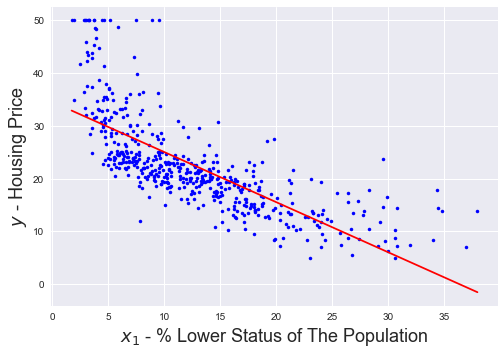

In [12]:
# Linear Regression Model
lin_x = np.c_[dataframe["LSTAT"]]
lin_y = np.c_[y]
model = LinearRegression()
model.fit(lin_x, lin_y)

# predict y from the data
x_new = np.linspace(lin_x.min(), lin_x.max(), 200)
y_new = model.predict(x_new[:, np.newaxis])


plt.plot(X['LSTAT'], y.values, "b.")
plt.plot(x_new, y_new, "r-")
plt.xlabel("$x_1$ - % Lower Status of The Population", fontsize=18)
plt.ylabel("$y$ - Housing Price", rotation=90, fontsize=18)
plt.show()

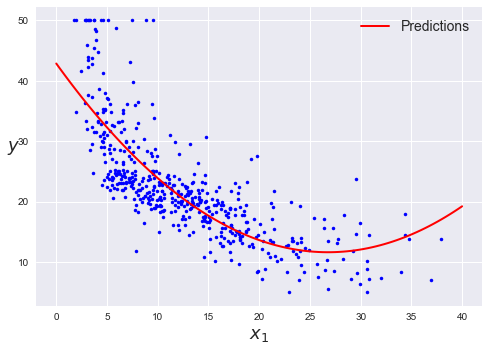

In [14]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(np.c_[dataframe["LSTAT"]])
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# plot
X_new=np.linspace(0, 40, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X['LSTAT'], y.values, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

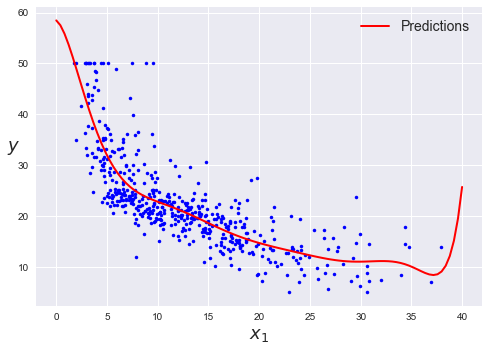

In [25]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(np.c_[dataframe["LSTAT"]])
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# plot
X_new=np.linspace(0, 40, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X['LSTAT'], y.values, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

<div style="font-size:14px; border:1px solid black; padding:10px">
    <center>Comment:</center>
<ul>
<li>Overfitting in machine learning describes a model that has learned the features, noise, and patters of the training data.</li><br>    
<li></li><br>
<li></li><br>
<li>O</li><br>
<li> <font color="red"><strong><em></em></strong></font>.</li><br>    
</ul>
</div>

In [ ]:
image = os.path.join(path, 'images/reg_meme.png')
Image(filename=image)

<hr style="border-top: 3px solid Black;">

<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1>Regularization</h1></center>
<ul>
    <li>is a form of regression that can <strong><em>regulate</em></strong> the magnitude of the coefficent of estimates. This will be discussed below.</li><br>    
    <li>Regulation of the coefficient of estimates discourages a model from learning the training data too well.</li><br>
    <li>Regularization prevents complex models from being developed.</li><br>
    <li>Preventing complex models also avoids the risk of overfitting.</li><br> 
</ul>
</div>

<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1>Mathematical Intuition of Regularization</h1></center>
<ul>
    <li></li><br>    
    <li></li><br>
    <li></li><br>
    <li></li><br> 
</ul>
</div>

In [ ]:
image = os.path.join(path, 'images/simple_lin_reg_example.png')
Image(filename=image)

In [ ]:
image = os.path.join(path, 'images/reg_rss_latex.png')
Image(filename=image)

<hr style="border-top: 3px solid Black;">

<h1>Evaluate Data Analysis</h1>

In [ ]:
# Linear Regression Model
lin_x = np.c_[dataframe["LSTAT"]]
lin_y = np.c_[y]
model = LinearRegression()
model.fit(lin_x, lin_y)

# predict y from the data
x_new = np.linspace(lin_x.min(), lin_x.max(), 200)
y_new = model.predict(x_new[:, np.newaxis])


plt.plot(X['LSTAT'], y.values, "b.")
plt.plot(x_new, y_new, "r-")
plt.xlabel("$x_1$ - % Lower Status of The Population", fontsize=18)
plt.ylabel("$y$ - Housing Price", rotation=90, fontsize=18)
plt.show()

<div style="font-size:14px; border:1px solid black; padding:10px">
    <center><h1>Standard liner regression does not fit the data properly.</h1></center>
<ul>
<li>Linear models are typically considered for data that scatters in a single direction (correlate).</li><br>    
<li>In many cases, data will be more complex than a straight line, calling for a more nuanced approach.</li><br>
<li>Linear models can be used to fit nonlinear data.</li><br>
<li>One method is to add new features that contains the powers of the original features.</li><br>
<li>A linear model can then be trained on this new extended data, and this technique is called <font color="red"><strong><em>Polynomial regression</em></strong></font>.</li><br>    
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<h1>Generating polynomial features using sklearn <code>PolynomialFeatures()</code></h1>

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(np.c_[dataframe["LSTAT"]])

<h1>Linear Regression on Transformed Data</h1>

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
image = os.path.join(path, 'images/poly_equation.png')
Image(filename=image)

<h1>Plot Data with Linear Regression Curve that used Transformed Data</h1>

In [ ]:
X_new=np.linspace(0, 40, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X['LSTAT'], y.values, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
        <center><h3>Comments.</h3></center>
<ul>
    <li>Using the transformed data allowed the linear regression model to learn the data better.</li><br>      
    <li>The prediction curve now more closely fits the shape of the data.</li><br>
    <li>Improved learning may yield better predictions.</li><br>
    <li>The current red line provides a good estimate, but higher dimensional models can be developed that allow the red curve to oscillate around each point</li><br>
    <li>High dimensional polynomial regression can improve how the algorithm learns the data, but it increases the variance (make it less generalizable to new data).</li><br>
</ul>
</div>

<hr style="border-top: 3px solid Black;">